# Visualize LDSDA pathways

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

visualize_dsda function is part of the dsda_functions.py module. It is used to visualize the LDSDA pathways. The function takes as input the LDSDA pathways and the name of the output file. The output file is a pdf file that contains the LDSDA pathways.

In [26]:
def visualize_dsda(
    route: list = [],
    k_values: list = [],
    feas_x: list = [],
    feas_y: list = [],
    infeas_x: list = [],
    infeas_y: list = [],
    nan_x: list = [],
    nan_y: list = [],
    objs: list = [],
    k: str = '?',
    ext1_name: str = 'External variable 1',
    ext2_name: str = 'External variable 2',
):
    X1, X2 = feas_x, feas_y
    cm = plt.colormaps.get_cmap('viridis_r')
    sc = plt.scatter(X1, X2, s=80, c=objs, cmap=cm)

    # Scatter plot for NaN objectives as hollow circles
    plt.scatter(nan_x, nan_y, s=80, facecolors='none', edgecolors='red')

    # Scatter plot for Evaluated_Infeasible points as hollow triangles
    plt.scatter(infeas_x, infeas_y, s=80, marker='^', facecolors='none', edgecolors='black')

    def drawArrow(A, B):
        plt.arrow(
            A[0],
            A[1],
            B[0] - A[0],
            B[1] - A[1],
            width=0.00005,
            head_width=0.15,
            head_length=0.08,
            color='black',
            shape='full',
        )

    for i in range(len(route) - 1):
        drawArrow(route[i], route[i + 1])
    
    cbar = plt.colorbar(sc)
    cbar.set_label('Objective function', rotation=90)
    plt.title('LDSDA for the Distillation Column with 17 potential trays')
    plt.xlabel(ext1_name)
    plt.ylabel(ext2_name)
    plt.legend(['Route', 'Invalid', 'Evaluated Infeasible'])
    plt.show()

Read the data from the file. Using Pandas, we read the data from the file and store it in a dataframe. The dataframe contains the the complete enumerations of the LDSDA lattice.

In [24]:
df = pd.read_csv('compl_enum_column_17_baron.csv')
# df = pd.read_csv('compl_enum_column_17_knitro.csv')
df

,Point,x,y,Objective,Status,Time,Global_Time
0,"[7, 1]",7,1,NaN,Optimal,3601.319000,3624.584724
1,"[8, 1]",8,1,NaN,Evaluated_Infeasible,1.706000,3630.338624
2,"[9, 1]",9,1,NaN,Evaluated_Infeasible,844.731000,4478.991840
3,"[9, 2]",9,2,NaN,Optimal,3600.546999,8080.006499
4,"[10, 1]",10,1,22973.104623,Optimal,3600.127000,11683.886412
5,"[10, 2]",10,2,22959.804548,Optimal,3600.542000,15284.936932
6,"[10, 3]",10,3,NaN,Optimal,3601.322000,18886.923965
7,"[11, 1]",11,1,20881.937171,Optimal,3600.157000,22490.673099
8,"[11, 2]",11,2,20392.219469,Optimal,3600.208000,26091.400643
9,"[11, 3]",11,3,20355.058452,Optimal,3600.141000,29692.272626


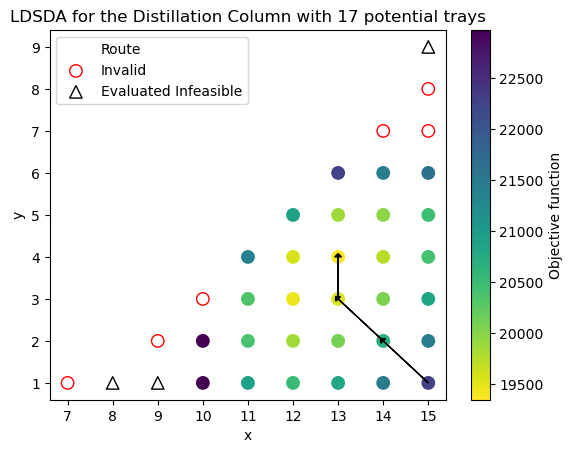

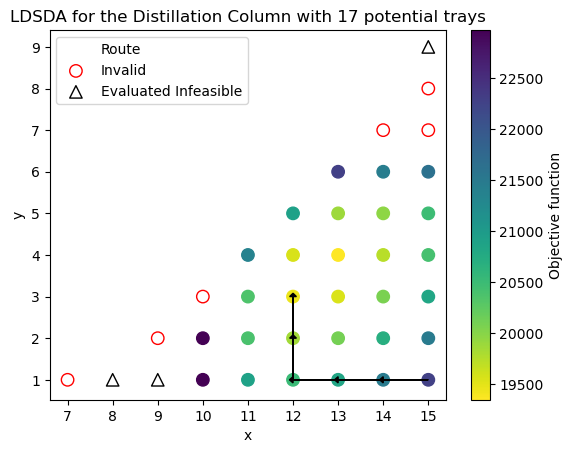

In [4]:
# Filter points based on their status
optimal_df = df[df['Status'] == 'Optimal']
infeasible_df = df[df['Status'] == 'Evaluated_Infeasible']

# Extract x, y coordinates and objective values for optimal points
feas_x = optimal_df['x'].tolist()
feas_y = optimal_df['y'].tolist()
objs = optimal_df['Objective'].tolist()  # Replacing NaN with 0 for plotting purposes

# Extract x, y coordinates for infeasible points
infeas_x = infeasible_df['x'].tolist()
infeas_y = infeasible_df['y'].tolist()

# Identify points with NaN objectives within the optimal dataset
nan_obj_indices = optimal_df['Objective'].index[optimal_df['Objective'].isna()].tolist()
nan_x = optimal_df['x'][nan_obj_indices].tolist()
nan_y = optimal_df['y'][nan_obj_indices].tolist()

# For the route, I am assuming you want to traverse optimal points in order they appear in the CSV
route1 = [(15, 1), (14, 2), (13, 3), (13, 4)]
route2 = [(15, 1), (14, 1), (13, 1), (12, 1), (12, 2), (12, 3)]

# Visualize using the provided function
visualize_dsda(route=route1, feas_x=feas_x, feas_y=feas_y, infeas_x = infeas_x, infeas_y = infeas_y, nan_x = nan_x, nan_y = nan_y, objs=objs, k='Infinity', ext1_name='x', ext2_name='y')
visualize_dsda(route=route2, feas_x=feas_x, feas_y=feas_y, infeas_x = infeas_x, infeas_y = infeas_y, nan_x = nan_x, nan_y = nan_y, objs=objs, k='2', ext1_name='x', ext2_name='y')

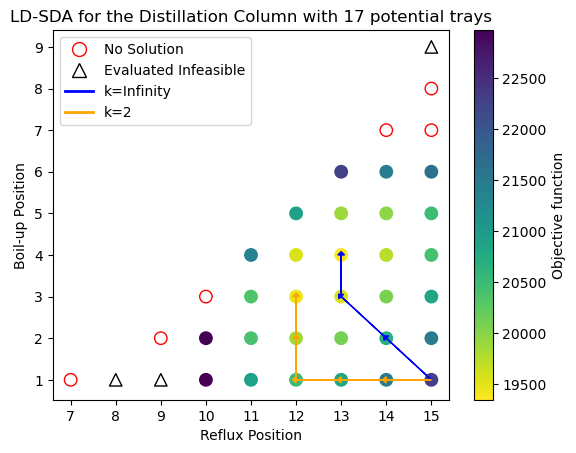

In [5]:
def visualize_dsda(
    routes_colors: list = [],
    feas_x: list = [],
    feas_y: list = [],
    infeas_x: list = [],
    infeas_y: list = [],
    nan_x: list = [],
    nan_y: list = [],
    objs: list = [],
    ext1_name: str = 'External variable 1',
    ext2_name: str = 'External variable 2',
):
    cm = plt.colormaps.get_cmap('viridis_r')

    # Scatter plot for NaN objectives as hollow circles
    plt.scatter(nan_x, nan_y, s=80, facecolors='none', edgecolors='red')

    # Scatter plot for Evaluated_Infeasible points as hollow triangles
    plt.scatter(infeas_x, infeas_y, s=80, marker='^', facecolors='none', edgecolors='black')

    sc = plt.scatter(feas_x, feas_y, s=80, c=objs, cmap=cm)
    cbar = plt.colorbar(sc)
    cbar.set_label('Objective function', rotation=90)

    for route, color in routes_colors:
        for i in range(len(route) - 1):
            plt.arrow(
                route[i][0],
                route[i][1],
                route[i + 1][0] - route[i][0],
                route[i + 1][1] - route[i][1],
                width=0.00005,
                head_width=0.15,
                head_length=0.08,
                color=color,
            )

    plt.title('LD-SDA for the Distillation Column with 17 potential trays')
    plt.xlabel(ext1_name)
    plt.ylabel(ext2_name)
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='red', markerfacecolor='white', markersize=10, label='No Solution', linestyle='None'),
        plt.Line2D([0], [0], marker='^', color='black', markerfacecolor='white', markersize=10, label='Evaluated Infeasible', linestyle='None'),
        plt.Line2D([0], [0], color='blue', lw=2, label='k=Infinity'),
        plt.Line2D([0], [0], color='orange', lw=2, label='k=2')
    ]
    plt.legend(handles=legend_elements)
    plt.show()

df = pd.read_csv('compl_enum_column_17_baron.csv')

# Filter points based on their status
optimal_df = df[df['Status'] == 'Optimal']
infeasible_df = df[df['Status'] == 'Evaluated_Infeasible']

# Extract x, y coordinates and objective values for optimal points
feas_x = optimal_df['x'].tolist()
feas_y = optimal_df['y'].tolist()
objs = optimal_df['Objective'].tolist()  # Replacing NaN with 0 for plotting purposes

# Extract x, y coordinates for infeasible points
infeas_x = infeasible_df['x'].tolist()
infeas_y = infeasible_df['y'].tolist()

# Identify points with NaN objectives within the optimal dataset
nan_obj_indices = optimal_df['Objective'].index[optimal_df['Objective'].isna()].tolist()
nan_x = optimal_df['x'][nan_obj_indices].tolist()
nan_y = optimal_df['y'][nan_obj_indices].tolist()

# For the route, I am assuming you want to traverse optimal points in order they appear in the CSV
route1 = [(15, 1), (14, 2), (13, 3), (13, 4)]
route2 = [(15, 1), (14, 1), (13, 1), (12, 1), (12, 2), (12, 3)]

# Visualize both routes on the same graph
routes_colors = [(route1, 'blue'), (route2, 'orange')]
# routes_colors = [(route1, 'blue')]
# routes_colors = [(route2, 'orange')]
visualize_dsda(routes_colors=routes_colors, feas_x=feas_x, feas_y=feas_y, infeas_x=infeas_x, infeas_y=infeas_y, nan_x=nan_x, nan_y=nan_y, objs=objs, ext1_name='Reflux Position', ext2_name='Boil-up Position')

For the Small Batch Problem Case, the data is read from the file small_batch_problem_case.csv. The file contains the complete enumerations of the LDSDA lattice for the small batch problem case.
The data can be expressed as the 3d lattice.
Therefore, the modifications to the code are applied.

In [27]:
df = pd.read_csv('compl_enum_small_batch_baron.csv')
df

,Point,x,y,z,Objective,Status,Time,Global_Time
0,"[2, 2, 1]",2,2,1,167427.657115,Optimal,0.024,0.416903
1,"[2, 2, 2]",2,2,2,204601.967629,Optimal,0.035,0.523223
2,"[2, 2, 3]",2,2,3,241776.278143,Optimal,0.035,0.634187
3,"[2, 3, 1]",2,3,1,178545.195839,Optimal,0.038,0.743225
4,"[2, 3, 2]",2,3,2,209964.948666,Optimal,0.039,0.856056
5,"[2, 3, 3]",2,3,3,241384.701493,Optimal,0.038,0.966499
6,"[3, 2, 1]",3,2,1,185768.812505,Optimal,0.024,1.131708
7,"[3, 2, 2]",3,2,2,222943.123019,Optimal,0.036,1.238738
8,"[3, 2, 3]",3,2,3,260117.433533,Optimal,0.038,1.345297
9,"[3, 3, 1]",3,3,1,181201.665512,Optimal,0.034,1.449288


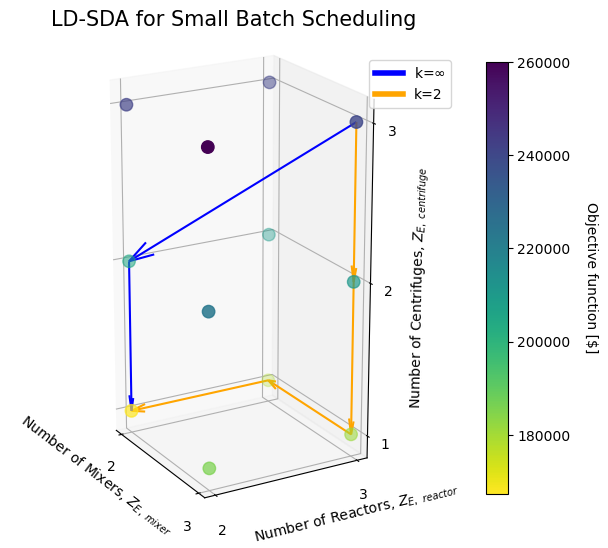

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib.ticker import MaxNLocator

def visualize_dsda(
    routes_colors: list = [],
    feas_x: list = [],
    feas_y: list = [],
    feas_z: list = [],
    objs: list = [],
    ext1_name: str = 'External variable 1',
    ext2_name: str = 'External variable 2',
    ext3_name: str = 'External variable 3',
):
    fig = plt.figure(figsize=(8, 18))  # Adjust the figure size here
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect((1, 1, 2))

    X1, X2, X3 = feas_x, feas_y, feas_z
    cm = plt.get_cmap('viridis_r')
    sc = ax.scatter(X1, X2, X3, s=80, c=objs, cmap=cm)

    def drawArrow(A, B, color):
        ax.quiver(
            A[0], A[1], A[2],
            B[0] - A[0], B[1] - A[1], B[2] - A[2],
            arrow_length_ratio=0.1,
            color=color
        )

    for route_color in routes_colors:
        route, color = route_color
        for i in range(len(route) - 1):
            drawArrow(route[i], route[i + 1], color)

    custom_lines = [plt.Line2D([0], [0], color='blue', lw=4),
                    plt.Line2D([0], [0], color='orange', lw=4)]
    ax.legend(custom_lines, ['k=$\infty$', 'k=2'])

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.zaxis.set_major_locator(MaxNLocator(integer=True))

    cbar = plt.colorbar(sc, pad=0.05, shrink=0.3)  # Adjusted color bar size
    cbar.set_label('Objective function [$]', rotation=270, labelpad=20)

    # Adjust label positions to avoid overlap
    ax.set_title('LD-SDA for Small Batch Scheduling', fontsize=15, pad=20)  # Adjusted title position
    ax.set_xlabel(ext1_name.replace('Z_E, mixer', '$Z_{E,\\ mixer}$'), labelpad=-1)
    ax.set_ylabel(ext2_name.replace('Z_E, reactor', '$Z_{E,\\ reactor}$'), labelpad=-1)
    ax.set_zlabel(ext3_name.replace('Z_E, centrifuge', '$Z_{E,\\ centrifuge}$'), labelpad=10)

    # Optionally adjust the view angle if necessary
    ax.view_init(elev=20, azim=-30)  # Adjust the elevation and azimuth for a better view
    plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)  # Adjusted subplot padding for better layout

    plt.show()

# Example usage with two routes
route3 = [(3,3,3), (2,2,2), (2,2,1)]
route4 = [(3,3,3), (3,3,2), (3,3,1), (2,3,1), (2,2,1)]
routes_colors = [(route3, 'blue'), (route4, 'orange')]

df = pd.read_csv('compl_enum_small_batch_baron.csv')

# Extract x, y, z coordinates and objective values
feas_x = df['x'].tolist()
feas_y = df['y'].tolist()
feas_z = df['z'].tolist()
objs = df['Objective'].tolist()  # Replacing NaN with 0 for plotting purposes

# Visualize with multiple routes
visualize_dsda(routes_colors=routes_colors, feas_x=feas_x, feas_y=feas_y, feas_z=feas_z, objs=objs, ext1_name='Number of Mixers, Z_E, mixer                          ', ext2_name='                           Number of Reactors, Z_E, reactor', ext3_name='Number of Centrifuges, Z_E, centrifuge')


This is the code for finding the local minimums of the LDSDA lattice.
The code first make a dictionary for the each points of integer variables and the corresponding value of the objective function.
Then, the code finds the local minimums of the LDSDA lattice. by comparing the neighboring points of the LDSDA lattice.
There are 2 cases for the local minimums of the LDSDA lattice.
The first case is when the neighboring points of the LDSDA is based on the $k=2$ norms.
Given the two dimensional plane of the LDSDA lattice, $k=2$ norms of the neighboring points of the LDSDA lattice are the points that are located in the 4 directions of the LDSDA lattice.
Up, down, left, and right.
The second case is when the neighboring points of the LDSDA is based on the $k=\infty$ norms.
Not only the up, down, left, and right, but also the diagonal points of the LDSDA lattice are considered as the neighboring points of the LDSDA lattice.

In [85]:
import pandas as pd

# Read the CSV data into a DataFrame
data = pd.read_csv('compl_enum_cstr_30_baron_dantzig.csv')

# Convert the DataFrame to a dictionary for easy lookup
data_dict = {(row['x'], row['y']): row['Objective'] for index, row in data.iterrows()}
# print(data_dict) # Uncomment to see the dictionary

# Function to compare objective values k=2
def compare_objectives(x, y, data_dict):
    current_obj = data_dict.get((x, y))
    # Neighboring coordinates
    neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)] # k=2
    for nx, ny in neighbors:
        # Check if neighbor exists and compare objectives
        if data_dict.get((nx, ny)) is not None:
            if current_obj >= data_dict[(nx, ny)]:
                return False
    return True

# List to store coordinates with lower objective values
lower_objective_coords = []

# Loop through each coordinate
for x, y in data_dict.keys():
    if compare_objectives(x, y, data_dict):
        lower_objective_coords.append((x, y))

print('k=2, local minima:',lower_objective_coords)

# Append the coordinates with lower objective values to the DataFrame
lower_objective_df = pd.DataFrame(lower_objective_coords, columns=['x', 'y'])
print(lower_objective_df)

# Function to compare objective values, k=Infinity
def compare_objectives(x, y, data_dict):
    current_obj = data_dict.get((x, y))
    # Neighboring coordinates
    neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1), (x-1, y-1), (x+1, y+1), (x-1, y+1), (x+1, y-1)] # k = Infinity
    for nx, ny in neighbors:
        # Check if neighbor exists and compare objectives
        if data_dict.get((nx, ny)) is not None:
            if current_obj >= data_dict[(nx, ny)]:
                return False
    return True

# List to store coordinates with lower objective values
lower_objective_inf = []

# Loop through each coordinate
for x, y in data_dict.keys():
    if compare_objectives(x, y, data_dict):
        lower_objective_inf.append((x, y))

print()
print('k=Infinity, local minima:',lower_objective_inf)

# Append the coordinates with lower objective values to the DataFrame
lower_objective_inf_df = pd.DataFrame(lower_objective_inf, columns=['x', 'y'])
print(lower_objective_inf_df)


k=2, local minima: [(5, 2), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30)]
     x   y
0    5   2
1    5   5
2    6   6
3    7   7
4    8   8
5    9   9
6   10  10
7   11  11
8   12  12
9   13  13
10  14  14
11  15  15
12  16  16
13  17  17
14  18  18
15  19  19
16  20  20
17  21  21
18  22  22
19  23  23
20  24  24
21  25  25
22  26  26
23  27  27
24  28  28
25  29  29
26  30  30

k=Infinity, local minima: [(5, 2), (30, 30)]
    x   y
0   5   2
1  30  30


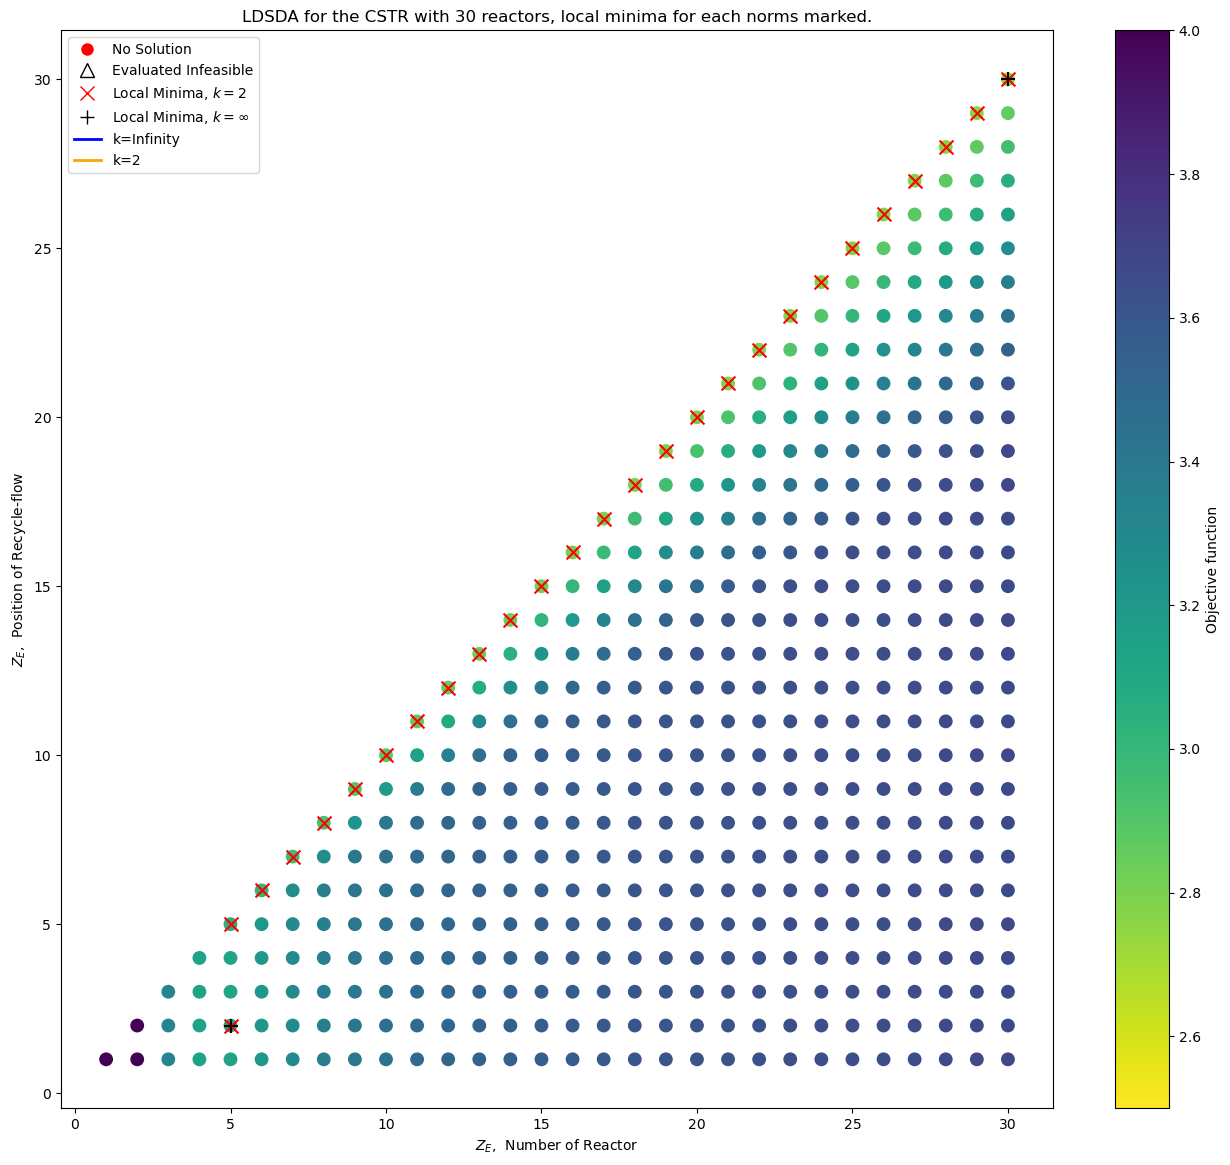

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def visualize_dsda(
    routes_colors: list = [],
    feas_x: list = [],
    feas_y: list = [],
    infeas_x: list = [],
    infeas_y: list = [],
    nan_x: list = [],
    nan_y: list = [],
    local_minima_x: list = [],
    local_minima_y: list = [],
    local_minima_x_inf: list = [],
    local_minima_y_inf: list = [],
    objs: list = [],
    ext1_name: str = 'External variable 1',
    ext2_name: str = 'External variable 2',
):
    cm = plt.colormaps.get_cmap('viridis_r')
    plt.figure(figsize=(16, 14))

    # Scatter plot for NaN objectives as hollow circles
    plt.scatter(nan_x, nan_y, s=80, facecolors='none', edgecolors='red')

    # Scatter plot for Evaluated_Infeasible points as hollow triangles
    plt.scatter(infeas_x, infeas_y, s=80, marker='^', facecolors='none', edgecolors='black')

    sc = plt.scatter(feas_x, feas_y, s=80, c=objs, cmap=cm, vmin=2.5, vmax=4)
    cbar = plt.colorbar(sc)
    cbar.set_label('Objective function', rotation=90)

    # Scatter plot for local minima for k=2 as Crosses
    plt.scatter(local_minima_x, local_minima_y, s=100, marker='x', color='red')

    # Scatter plot for the local minima for k=Infinity as Plus signs
    plt.scatter(local_minima_x_inf, local_minima_y_inf, s=100, marker='+', color='black')

    for route, color in routes_colors:
        for i in range(len(route) - 1):
            plt.arrow(
                route[i][0],
                route[i][1],
                route[i + 1][0] - route[i][0],
                route[i + 1][1] - route[i][1],
                width=0.00005,
                head_width=0.15,
                head_length=0.08,
                color=color,
            )

    plt.title('LDSDA for the CSTR with 30 reactors, local minima for each norms marked.')

    # Using LaTeX for subscript only for 'E' in the axis labels
    plt.xlabel('$Z_E$, ' + ext1_name.split('Z_E,')[1] if 'Z_E,' in ext1_name else ext1_name)
    plt.ylabel('$Z_E$, ' + ext2_name.split('Z_E,')[1] if 'Z_E,' in ext2_name else ext2_name)
    
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='No Solution'),
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='none', markeredgecolor='black', markersize=10, label='Evaluated Infeasible'),
        plt.Line2D([0], [0], marker='x', color='w', markeredgecolor='red', markersize=10, label='Local Minima, $k=2$'),
        plt.Line2D([0], [0], marker='+', color='w', markeredgecolor='black', markersize=10, label='Local Minima, $k=\infty$'),
        plt.Line2D([0], [0], color='blue', lw=2, label='k=Infinity'),
        plt.Line2D([0], [0], color='orange', lw=2, label='k=2')
    ]
    plt.legend(handles=legend_elements)
    plt.show()

df = pd.read_csv('compl_enum_cstr_30_baron_dantzig.csv')

route1 = []
route2 = []

# Enter the local minima coordinates for k=2
local_minima_x = lower_objective_df['x'].tolist()
local_minima_y = lower_objective_df['y'].tolist()

# Enter the local minima coordinates for k=2
local_minima_x_inf = lower_objective_inf_df['x'].tolist()
local_minima_y_inf = lower_objective_inf_df['y'].tolist() 

# Filter points based on their status
optimal_df = df[df['Status'] == 'Optimal']
infeasible_df = df[df['Status'] == 'Evaluated_Infeasible']

# Extract x, y coordinates and objective values for optimal points
feas_x = optimal_df['x'].tolist()
feas_y = optimal_df['y'].tolist()
objs = optimal_df['Objective'].tolist()  # Replacing NaN with 0 for plotting purposes

# Extract x, y coordinates for infeasible points
infeas_x = infeasible_df['x'].tolist()
infeas_y = infeasible_df['y'].tolist()

# Identify points with NaN objectives within the optimal dataset
nan_obj_indices = optimal_df['Objective'].index[optimal_df['Objective'].isna()].tolist()
nan_x = optimal_df['x'][nan_obj_indices].tolist()
nan_y = optimal_df['y'][nan_obj_indices].tolist()

# Visualize both routes on the same graph
routes_colors = [(route1, 'blue'), (route2, 'orange')]
# routes_colors = [(route1, 'blue')]
# routes_colors = [(route2, 'orange')]

visualize_dsda(routes_colors=routes_colors, 
               feas_x=feas_x, 
               feas_y=feas_y, 
               infeas_x=infeas_x, 
               infeas_y=infeas_y, 
               nan_x=nan_x, 
               nan_y=nan_y, 
               local_minima_x= local_minima_x, 
               local_minima_y= local_minima_y, 
               local_minima_x_inf= local_minima_x_inf,
               local_minima_y_inf= local_minima_y_inf,
               objs=objs, 
               ext1_name='Z_E, Number of Reactor', 
               ext2_name='Z_E, Position of Recycle-flow')

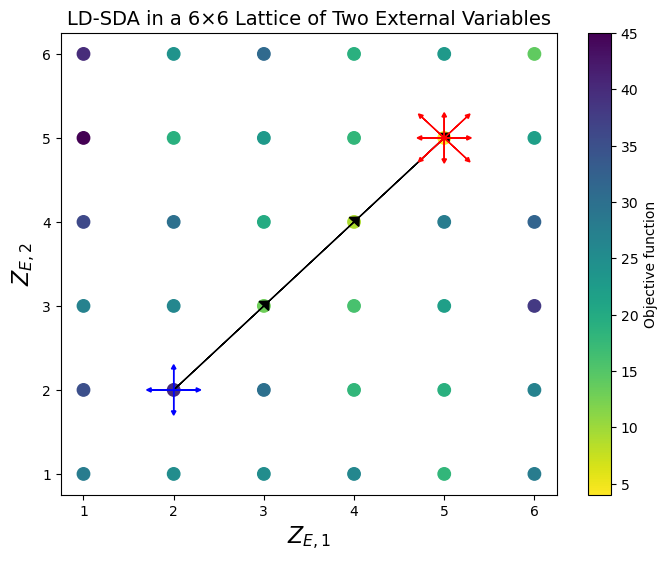

In [11]:
def visualize_dsda(
    routes_colors: list = [],
    feas_x: list = [],
    feas_y: list = [],
    infeas_x: list = [],
    infeas_y: list = [],
    nan_x: list = [],
    nan_y: list = [],
    objs: list = [],
    ext1_name: str = 'External variable 1',
    ext2_name: str = 'External variable 2',
     arrow_points_colors: dict = {}
):
    cm = plt.colormaps.get_cmap('viridis_r')
    plt.figure(figsize=(8, 6))

    # Scatter plot for NaN objectives as hollow circles
    plt.scatter(nan_x, nan_y, s=80, facecolors='none', edgecolors='red')

    # Scatter plot for Evaluated_Infeasible points as hollow triangles
    plt.scatter(infeas_x, infeas_y, s=80, marker='^', facecolors='none', edgecolors='black')

    sc = plt.scatter(feas_x, feas_y, s=80, c=objs, cmap=cm)
    cbar = plt.colorbar(sc)
    cbar.set_label('Objective function', rotation=90)

    for route, color in routes_colors:
        for i in range(len(route) - 1):
            plt.arrow(
                route[i][0],
                route[i][1],
                route[i + 1][0] - route[i][0],
                route[i + 1][1] - route[i][1],
                width=0.00005,
                head_width=0.15,
                head_length=0.08,
                color=color,
            )

    # Define all eight directions
    all_directions = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, 1), (-1, -1), (1, -1)]
    # Define only the four cardinal directions
    cardinal_directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    for point, color in arrow_points_colors.items():
        directions = cardinal_directions if color == 'blue' else all_directions
        for dx, dy in directions:
            plt.arrow(point[0], point[1], dx * 0.25, dy * 0.25, head_width=0.05, head_length=0.05, fc=color, ec=color)

    plt.title('LD-SDA in a 6×6 Lattice of Two External Variables', fontsize=14)

    # Using LaTeX for subscript in axis labels
    plt.xlabel('$Z_{E,1}$' if 'Z_E,1' in ext1_name else ext1_name, fontsize=16)
    plt.ylabel('$Z_{E,2}$' if 'Z_E,2' in ext2_name else ext2_name, fontsize=16)

    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='No Solution'),
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='none', markeredgecolor='black', markersize=10, label='Evaluated Infeasible'),
        plt.Line2D([0], [0], color='blue', lw=2, label='k=Infinity'),
        plt.Line2D([0], [0], color='orange', lw=2, label='k=2')
    ]
    plt.show()

df = pd.read_csv('LDSDA.csv')

route1 = [(2,2), (3,3), (4,4), (5,5)]
route2 = []
arrow_points_colors = {(2, 2): 'blue', (5, 5): 'red'}

# Filter points based on their status
optimal_df = df[df['Status'] == 'Optimal']
infeasible_df = df[df['Status'] == 'Evaluated_Infeasible']

# Extract x, y coordinates and objective values for optimal points
feas_x = optimal_df['x'].tolist()
feas_y = optimal_df['y'].tolist()
objs = optimal_df['Objective'].tolist()  # Replacing NaN with 0 for plotting purposes

# Extract x, y coordinates for infeasible points
infeas_x = infeasible_df['x'].tolist()
infeas_y = infeasible_df['y'].tolist()

# Identify points with NaN objectives within the optimal dataset
nan_obj_indices = optimal_df['Objective'].index[optimal_df['Objective'].isna()].tolist()
nan_x = optimal_df['x'][nan_obj_indices].tolist()
nan_y = optimal_df['y'][nan_obj_indices].tolist()

# Visualize both routes on the same graph
routes_colors = [(route1, 'black'), (route2, 'orange')]
# routes_colors = [(route1, 'blue')]
# routes_colors = [(route2, 'orange')]
visualize_dsda(routes_colors=routes_colors, feas_x=feas_x, feas_y=feas_y, infeas_x=infeas_x, infeas_y=infeas_y, nan_x=nan_x, nan_y=nan_y, objs=objs, ext1_name='Z_E,1', ext2_name='Z_E,2', arrow_points_colors=arrow_points_colors)